# Bank Queue Problem

A coworker over lunch mentioned a fun fact coming from [queuing theory](https://en.wikipedia.org/wiki/Queueing_theory): imagine a bank with a single queue.  Customers arrive according to a Poisson process with event rate $\lambda = 0.1\,\,\,\mathrm{min}^{-1}$ (6 per hour, or average time between customers of 10 minutes).  The bank teller's service times are exponentially distributed with an event rate $\lambda = 0.1\,\,\,\mathrm{min}^{-1}$ (though they aren't Poisson because they depend on the arrival of customers).  What is the typical wait time for a customer within the queue?

It's Friday afternoon, so I can't be bothered to look up how to solve this analytically, so let's just solve it computationally.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import knowyourdata as kyd

# np.random.seed(42)

Draw samples for arrival $T$ and service duration $\Delta T$.  We can do this because:

- Service duration and arrival time are independent.
- The [wait times for a Poisson process](http://individual.utoronto.ca/zheli/poisson.pdf) are exponentially distributed with parameter $\lambda$

In [2]:
n_obs = 1000000

# Arrival times for customers, starting with zero for the first customer.
# `scale` is 1 / lambda for np.random.exponentials.
arrival_times = np.concatenate([np.array([0]),
                                np.cumsum(np.random.exponential(scale=10., size=(n_obs - 1)))])
# Service duration for the customers.  Assume customers don't prematurely leave.
service_durations = np.random.exponential(scale=10., size=n_obs)

The equation for the time when a customer $i$ is finished, $T_\mathrm{completion}(i)$ is

$$
T_\mathrm{completion}(i) = \mathrm{max}\left(T_\mathrm{completion}(i - 1), T_\mathrm{arrival}(i)\right) + \Delta T_\mathrm{service}(i)
$$

since the time customer $i$ gets served is either when they get there or when the teller is done with the previous customer.

In [3]:
# The time service is completed for customer i.
completion_times = np.empty(n_obs)
# The first customer arrives at an empty queue, so can be served immediately.
completion_times[0] = service_durations[0]

for i in range(1, completion_times.shape[0]):
    completion_times[i] = max(arrival_times[i], completion_times[i - 1]) + service_durations[i]

The queue time is obviously

$$
T_\mathrm{queue}(i) = T_\mathrm{completion}(i) - \Delta T_\mathrm{service}(i) - T_\mathrm{arrival}(i)
$$

In [4]:
queue_times = completion_times - service_durations - arrival_times

In [5]:
kyd.kyd(queue_times);

| Basic Statistics                                          | Array Structure                  	|
|                                                           |                                  	|
|    Mean:         Min:   0.0         -99 CI:   61.74       | Number of Dimensions:   1        	|
|  9.262e+03        1Q:   5.195e+03   -95 CI:   348.2       | Shape of Dimensions:    (1000000,)	|
|               Median:   9.885e+03   -68 CI:   3.388e+03   | Array Data Type:        float64  	|
|   Std Dev:        3Q:   1.306e+04   +68 CI:   1.397e+04   | Memory Size:            7.6MiB   	|
|  4.651e+03       Max:   1.902e+04   +95 CI:   1.698e+04   |                                  	|
|                                     +99 CI:   1.803e+04   | Number of NaN:  0                	|
|                                                           | Number of Inf:  0                	|

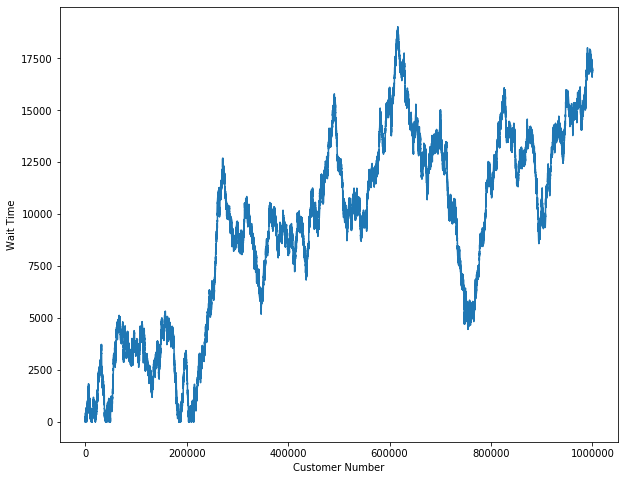

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(queue_times)
ax.set_xlabel("Customer Number")
ax.set_ylabel("Wait Time");

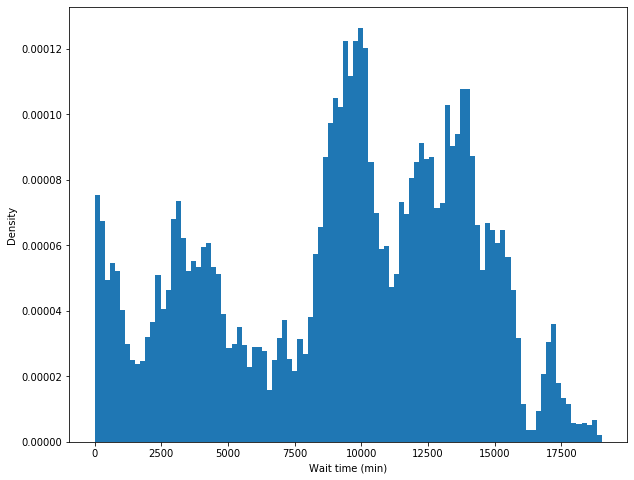

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(queue_times, bins=100, density=True)
ax.set_xlabel("Wait time (min)")
ax.set_ylabel("Density");

## Function for Repeated Measures

In [8]:
def run_experiment(n_obs=1000000):
    # Arrival times for customers, starting with zero for the first customer.
    arrival_times = np.concatenate([np.array([0]),
                                    np.cumsum(np.random.exponential(scale=10., size=(n_obs - 1)))])
    # Service duration for the customers.  Assume customers don't prematurely leave.
    service_durations = np.random.exponential(scale=10., size=n_obs)
    # The time service is completed for customer i.
    completion_times = np.empty(n_obs)
    # The first customer arrives at an empty queue, so can be served immediately.
    completion_times[0] = service_durations[0]

    for i in range(1, completion_times.shape[0]):
        completion_times[i] = max(arrival_times[i], completion_times[i - 1]) + service_durations[i]
    
    queue_times = completion_times - service_durations - arrival_times
    
    kyd.kyd(queue_times)
    
    fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
    ax1.plot(queue_times)
    ax1.set_xlabel("Customer Number")
    ax1.set_ylabel("Wait Time")
    ax2.hist(queue_times, bins=100, density=True)
    ax2.set_xlabel("Wait time (min)")
    ax2.set_ylabel("Density")

| Basic Statistics                                          | Array Structure                  	|
|                                                           |                                  	|
|    Mean:         Min:   0.0         -99 CI:   24.5        | Number of Dimensions:   1        	|
|  3.042e+03        1Q:   1.423e+03   -95 CI:   175.0       | Shape of Dimensions:    (1000000,)	|
|               Median:   2.707e+03   -68 CI:   1.016e+03   | Array Data Type:        float64  	|
|   Std Dev:        3Q:   4.451e+03   +68 CI:   5.123e+03   | Memory Size:            7.6MiB   	|
|  1.991e+03       Max:   1.008e+04   +95 CI:   7.798e+03   |                                  	|
|                                     +99 CI:   9.163e+03   | Number of NaN:  0                	|
|                                                           | Number of Inf:  0                	|

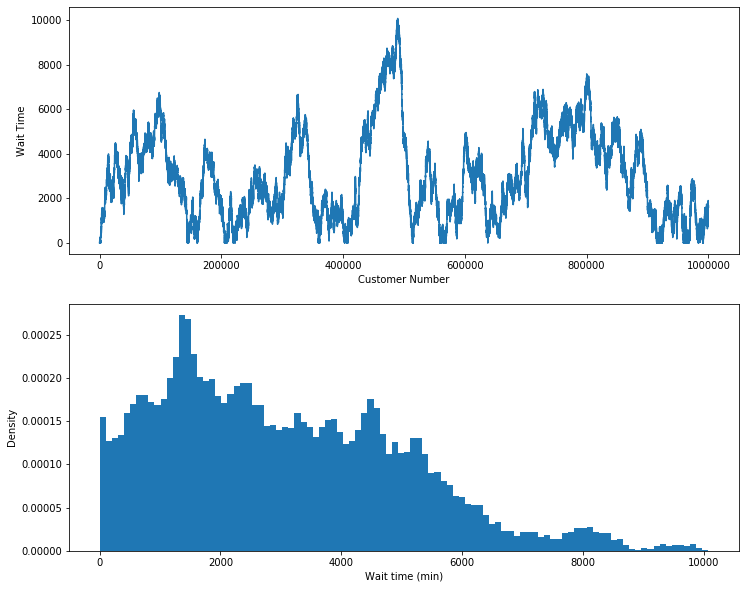

In [9]:
run_experiment()

| Basic Statistics                                          | Array Structure                  	|
|                                                           |                                  	|
|    Mean:         Min:  -3.553e-15   -99 CI:   62.18       | Number of Dimensions:   1        	|
|  5.929e+03        1Q:   1.895e+03   -95 CI:   318.5       | Shape of Dimensions:    (1000000,)	|
|               Median:   4.751e+03   -68 CI:   1.327e+03   | Array Data Type:        float64  	|
|   Std Dev:        3Q:   1.006e+04   +68 CI:   1.125e+04   | Memory Size:            7.6MiB   	|
|  4.345e+03       Max:   1.563e+04   +95 CI:   1.39e+04    |                                  	|
|                                     +99 CI:   1.474e+04   | Number of NaN:  0                	|
|                                                           | Number of Inf:  0                	|

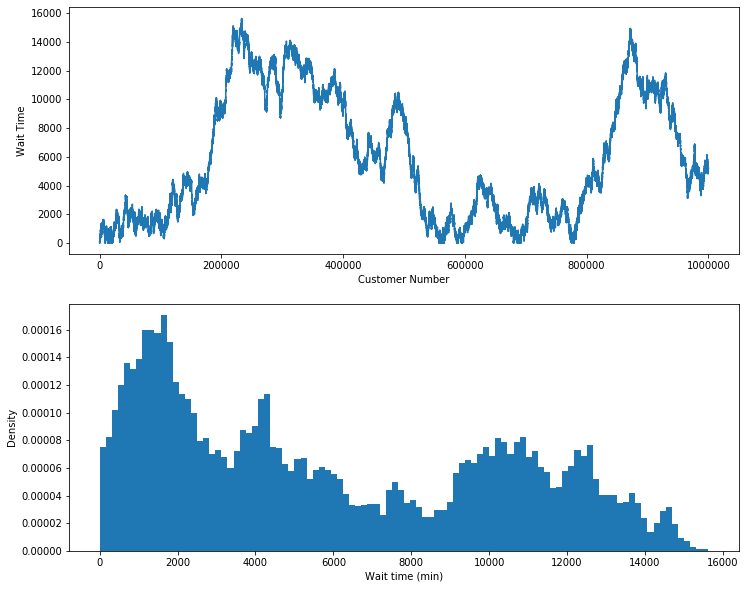

In [10]:
run_experiment()

| Basic Statistics                                          | Array Structure                  	|
|                                                           |                                  	|
|    Mean:         Min:   0.0         -99 CI:   53.42       | Number of Dimensions:   1        	|
|  1.038e+04        1Q:   8.881e+03   -95 CI:   262.5       | Shape of Dimensions:    (1000000,)	|
|               Median:   1.21e+04    -68 CI:   2.531e+03   | Array Data Type:        float64  	|
|   Std Dev:        3Q:   1.389e+04   +68 CI:   1.454e+04   | Memory Size:            7.6MiB   	|
|  4.843e+03       Max:   1.719e+04   +95 CI:   1.59e+04    |                                  	|
|                                     +99 CI:   1.663e+04   | Number of NaN:  0                	|
|                                                           | Number of Inf:  0                	|

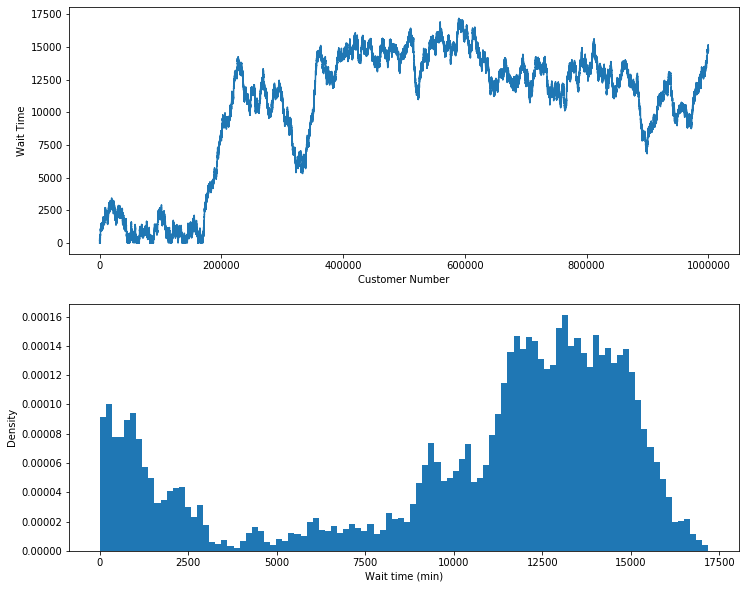

In [11]:
run_experiment()

| Basic Statistics                                          | Array Structure                   	|
|                                                           |                                   	|
|    Mean:         Min:  -9.095e-13   -99 CI:   135.2       | Number of Dimensions:   1         	|
|  1.606e+04        1Q:   6.73e+03    -95 CI:   731.1       | Shape of Dimensions:    (10000000,)	|
|               Median:   1.36e+04    -68 CI:   4.438e+03   | Array Data Type:        float64   	|
|   Std Dev:        3Q:   2.022e+04   +68 CI:   3.272e+04   | Memory Size:            76.3MiB   	|
|  1.186e+04       Max:   4.57e+04    +95 CI:   4.208e+04   |                                   	|
|                                     +99 CI:   4.389e+04   | Number of NaN:  0                 	|
|                                                           | Number of Inf:  0                 	|

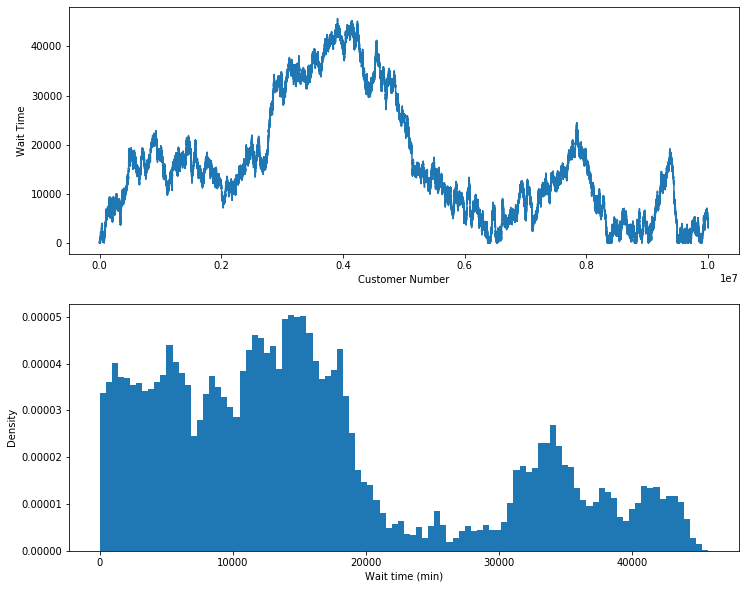

In [12]:
run_experiment(n_obs=10000000)